# ZenSpace survey exploratory data analysis

## Background

ZenSpace provides on-demand, soundproof workspaces around the UK.

Total number of respondents = 43

## Data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_excel("zenspace_report.xlsx", na_values = ["NA"])

In [2]:
data.head()

,#,Entrepreneur,Freelancer,Student,Other,How important is it for you to have access to a silent workspace?,How many hours per week on average would you use such a silent workspace?,Office,Co-working space,Cafe,...,Food,Printer,Scanner,Other.2,How many work partners would you typically work with in a silent workspace?,How much would you pay for an on-demand silent workspace? (£ per hour),"To get a free hour, please leave us your email. Thanks!",Start Date (UTC),Submit Date (UTC),Network ID
0,777c36d048a1bf4c977f018cb62a7f38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One partner,NaN,NaN,2016-05-16 14:05:52,2016-05-16 14:06:08,7078d87672
1,74450846f5258f07f3c695395803c574,NaN,NaN,NaN,I work in startup,Fairly important,20.0,NaN,Co-working space,NaN,...,Food,Printer,Scanner,NaN,Multiple partners,1.0,NaN,2016-05-16 15:03:15,2016-05-16 15:05:19,6ee7fa1474
2,50d5f536bc2b40bfccd3f0759ce7f696,Entrepreneur,NaN,NaN,NaN,Very important,30.0,Office,NaN,NaN,...,NaN,NaN,NaN,NaN,One partner,5.0,NaN,2016-05-16 15:13:15,2016-05-16 15:14:36,7078d87672
3,728596cdf5bde854cb962736ecf97ca0,Entrepreneur,NaN,NaN,NaN,Not that important,0.0,NaN,Co-working space,Cafe,...,NaN,NaN,NaN,NaN,One partner,0.0,NaN,2016-05-16 15:31:41,2016-05-16 15:34:04,7078d87672
4,b6f65298123dc1c1312a8d57661ff792,Entrepreneur,NaN,Student,NaN,Fairly important,10.0,NaN,NaN,NaN,...,NaN,Printer,NaN,NaN,One partner,5.0,NaN,2016-05-16 15:50:37,2016-05-16 15:52:07,2267b9d263


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 28 columns):
#                                                                              42 non-null object
Entrepreneur                                                                   27 non-null object
Freelancer                                                                     10 non-null object
Student                                                                        5 non-null object
Other                                                                          7 non-null object
How important is it for you to have access to a silent workspace?              41 non-null object
How many hours per week on average would you use such a silent workspace?      41 non-null float64
Office                                                                         24 non-null object
Co-working space                                                               12 non-null object
Cafe            

### Display column index

In [4]:
for index, i in enumerate(data.columns):
    print (index, i)

0 #
1 Entrepreneur
2 Freelancer
3 Student
4 Other
5 How important is it for you to have access to a silent workspace?
6 How many hours per week on average would you use such a silent workspace?
7 Office
8 Co-working space
9 Cafe
10 Library
11 Home
12 Other.1
13 Wi-Fi
14 Power supply
15 Toilet
16 Water dispenser
17 Drinks
18 Food
19 Printer
20 Scanner
21 Other.2
22 How many work partners would you typically work with in a silent workspace?
23 How much would you pay for an on-demand silent workspace? (£ per hour)
24 To get a free hour, please leave us your email. Thanks!
25 Start Date (UTC)
26 Submit Date (UTC)
27 Network ID


### Structured column index

1. User segment 1 - 4<br>
2. How important is a quiet workspace? 5<br>
3. Occupancy rate per week 6<br>
4. Where do users work now? 7 - 12<br>
5. What facilities are essential? 13 - 21<br>
6. Number of work partner 22<br>
7. Hourly rate users are willing to pay for 23

### 1. User segment

In [5]:
for index, i in enumerate(data.columns):
    if (index >= 1) and (index <= 4):
        print (data[i].value_counts(), "\n")

Entrepreneur    27
Name: Entrepreneur, dtype: int64 

Freelancer    10
Name: Freelancer, dtype: int64 

Student    5
Name: Student, dtype: int64 

Full time worker       1
Company Secretary      1
Employee               1
Director               1
Corporate employee     1
I work in startup      1
employment             1
Name: Other, dtype: int64 



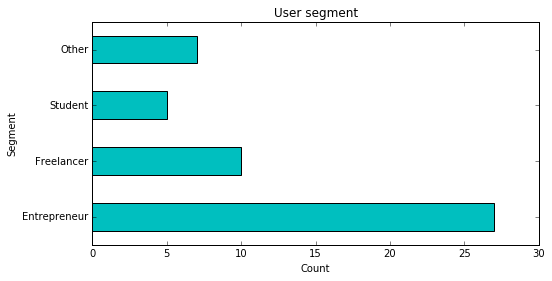

In [6]:
feature = ["Entrepreneur", "Freelancer", "Student", "Other"]
count = [27, 10, 5, 7]

user = pd.Series(count, feature)
user.plot.barh(figsize=(8, 4), color="c")

plt.xlabel("Count")
plt.ylabel("Segment")
plt.title("User segment")
plt.show()

Notes:
1. User segments are not mutually exclusive.
2. "Other" includes startup and corporate employees.

### 2. How important is a quiet workspace?

In [7]:
for index, i in enumerate(data.columns):
    if index == 5:
        print (data[i].value_counts(), "\n")

Fairly important         19
Very important           10
Not that important        8
Would be a lifesaver!     3
Not at all                1
Name: How important is it for you to have access to a silent workspace?, dtype: int64 



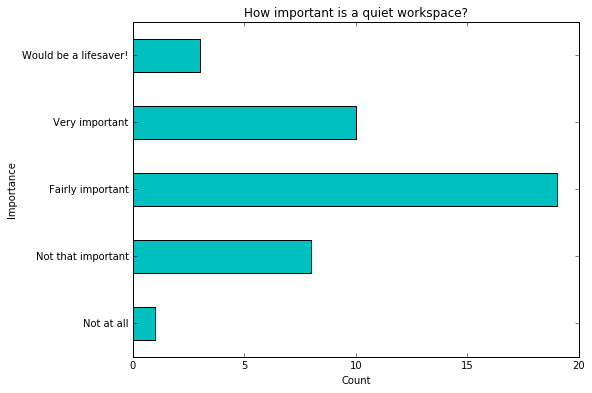

In [8]:
feature = ["Not at all", "Not that important", "Fairly important", "Very important", "Would be a lifesaver!"]
count = [1, 8, 19, 10, 3]

importance = pd.Series(count, feature)
importance.plot.barh(figsize=(8, 6), color="c")

plt.xlabel("Count")
plt.ylabel("Importance")
plt.title("How important is a quiet workspace?")
plt.show()

### 3. Occupancy rate per week

In [9]:
for index, i in enumerate(data.columns):
    if index == 6:
        print (data[i].value_counts(), "\n")

10.0     7
8.0      5
5.0      5
20.0     4
0.0      4
40.0     3
4.0      3
9.0      2
2.0      2
168.0    1
30.0     1
72.0     1
70.0     1
3.0      1
1.0      1
Name: How many hours per week on average would you use such a silent workspace?, dtype: int64 



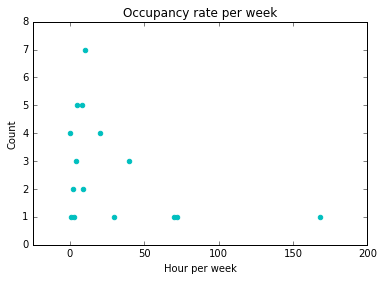

In [10]:
feature = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0, 70.0, 72.0, 168.0]
count = [4, 1, 2, 1, 3, 5, 5, 2, 7, 4, 1, 3, 1, 1, 1]

plt.scatter(feature, count, color="c")

plt.xlabel("Hour per week")
plt.ylabel("Count")
plt.title("Occupancy rate per week")
plt.xlim(-25)
plt.show()

### 4. Where do users work now?

In [11]:
for index, i in enumerate(data.columns):
    if (index >= 7) and (index <= 12):
        print (data[i].value_counts(), "\n")

Office    24
Name: Office, dtype: int64 

Co-working space    12
Name: Co-working space, dtype: int64 

Cafe    8
Name: Cafe, dtype: int64 

Library    5
Name: Library, dtype: int64 

Home    17
Name: Home, dtype: int64 

site                                                   1
Creative Space                                         1
Where is very good Free Wi-Fi, clean and tidy space    1
Labs or offices                                        1
Name: Other.1, dtype: int64 



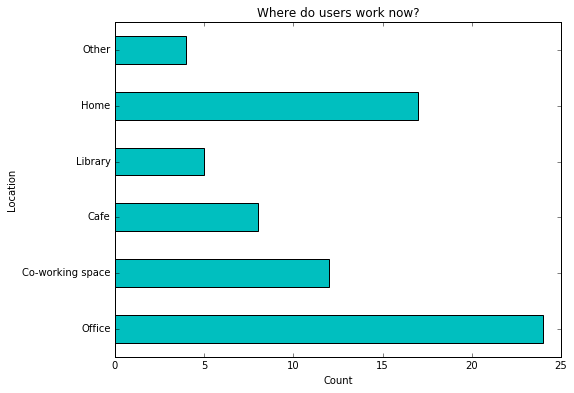

In [12]:
feature = ["Office", "Co-working space", "Cafe", "Library", "Home", "Other"]
count = [24, 12, 8, 5, 17, 4]

workspaces = pd.Series(count, feature)
workspaces.plot.barh(figsize=(8, 6), color="c")

plt.xlabel("Count")
plt.ylabel("Location")
plt.title("Where do users work now?")
plt.show()

Notes:
1. Locations are not mutually exclusive.

### 5. What facilities are essential?

In [13]:
for index, i in enumerate(data.columns):
    if (index >= 13) and (index <= 21):
        print (data[i].value_counts(), "\n")

Wi-Fi    40
Name: Wi-Fi, dtype: int64 

Power supply    39
Name: Power supply, dtype: int64 

Toilet    40
Name: Toilet, dtype: int64 

Water dispenser    21
Name: Water dispenser, dtype: int64 

Drinks    13
Name: Drinks, dtype: int64 

Food    11
Name: Food, dtype: int64 

Printer    17
Name: Printer, dtype: int64 

Scanner    10
Name: Scanner, dtype: int64 

Good lights    1
Chair          1
Light          1
Name: Other.2, dtype: int64 



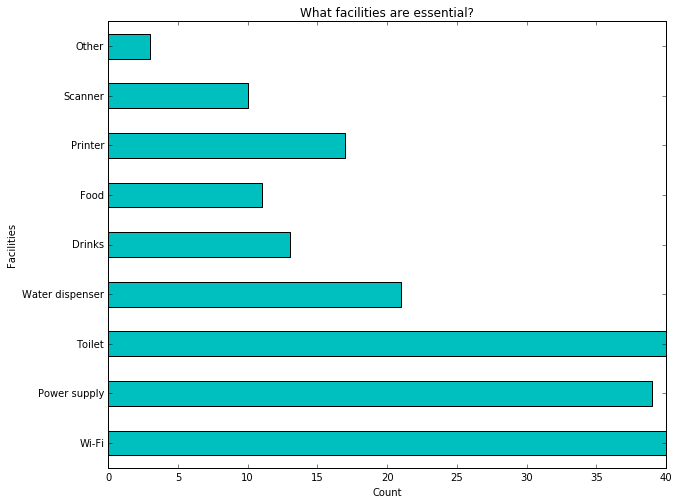

In [14]:
feature = ["Wi-Fi", "Power supply", "Toilet", "Water dispenser", "Drinks", "Food", "Printer", "Scanner", "Other"]
count = [40, 39, 40, 21, 13, 11, 17, 10, 3]

facilities = pd.Series(count, feature)
facilities.plot.barh(figsize=(10, 8), color="c")

plt.xlabel("Count")
plt.ylabel("Facilities")
plt.title("What facilities are essential?")
plt.show()

Notes:
1. Facilities are not mutually exclusive.
2. Other includes lighting and chair.

### 6. Number of work partner

In [15]:
for index, i in enumerate(data.columns):
    if index == 22:
        print (data[i].value_counts(), "\n")

Alone                19
One partner          15
Multiple partners     8
Name: How many work partners would you typically work with in a silent workspace?, dtype: int64 



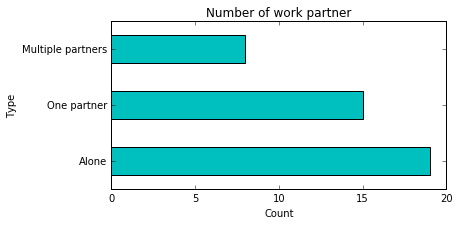

In [16]:
feature = ["Alone", "One partner", "Multiple partners"]
count = [19, 15, 8]

partner = pd.Series(count, feature)
partner.plot.barh(figsize=(6, 3), color="c")

plt.xlabel("Count")
plt.ylabel("Type")
plt.title("Number of work partner")
plt.show()

### 7. Hourly rate users are willing to pay for

In [17]:
for index, i in enumerate(data.columns):
    if index == 23:
        print (data[i].value_counts(), "\n")

1.0     10
5.0      7
0.0      7
2.0      5
10.0     4
15.0     2
8.0      2
3.0      1
Name: How much would you pay for an on-demand silent workspace? (£ per hour), dtype: int64 



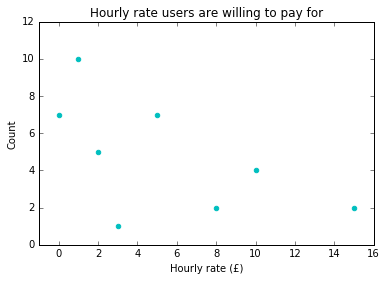

In [18]:
feature = [0, 1, 2, 3, 5, 8, 10, 15]
count = [7, 10, 5, 1, 7, 2, 4, 2]

plt.scatter(feature, count, color="c")

plt.xlabel("Hourly rate (£)")
plt.ylabel("Count")
plt.title("Hourly rate users are willing to pay for")
plt.xlim(-1)
plt.show()